In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
dataset = "Fake_Bills_Detection_Expanded.xlsx"
xls = pd.ExcelFile(dataset)

In [3]:
df = pd.read_excel(xls, sheet_name="fake_bills")
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.810000,104.860000,104.950000,4.520000,2.890000,112.830000
1,True,171.460000,103.360000,103.660000,3.770000,2.990000,113.090000
2,True,172.690000,104.480000,103.500000,4.400000,2.940000,113.160000
3,True,171.360000,103.910000,103.940000,3.620000,3.010000,113.510000
4,True,171.730000,104.280000,103.460000,4.040000,3.480000,112.540000
...,...,...,...,...,...,...,...
99995,True,172.591559,104.015133,103.564239,3.341976,2.809382,112.957642
99996,False,171.764889,103.901801,103.452420,4.242194,3.415704,111.716208
99997,True,171.411680,103.977614,104.128636,3.761649,3.520680,114.425646
99998,True,172.004731,103.780598,103.843138,4.969756,3.239390,113.431804


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   is_genuine    100000 non-null  bool   
 1   diagonal      100000 non-null  float64
 2   height_left   100000 non-null  float64
 3   height_right  100000 non-null  float64
 4   margin_low    100000 non-null  float64
 5   margin_up     100000 non-null  float64
 6   length        100000 non-null  float64
dtypes: bool(1), float64(6)
memory usage: 4.7 MB


In [5]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [6]:
duplicates = df.duplicated().sum()
duplicates


0

In [7]:
summary_stats = df.describe()
summary_stats

,diagonal,height_left,height_right,margin_low,margin_up,length
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,171.959280,104.029881,103.921584,4.486212,3.151147,112.679641
std,0.304122,0.299834,0.325557,0.654879,0.232352,0.872345
min,170.660034,102.521828,102.534467,1.625760,2.121113,108.665042
25%,171.754553,103.827051,103.701768,4.046339,2.994318,112.088109
50%,171.958913,104.029509,103.922018,4.486351,3.151563,112.682444
75%,172.163227,104.231079,104.142272,4.926250,3.307844,113.269398
max,173.229628,105.310169,105.245784,7.530362,4.116256,116.334995


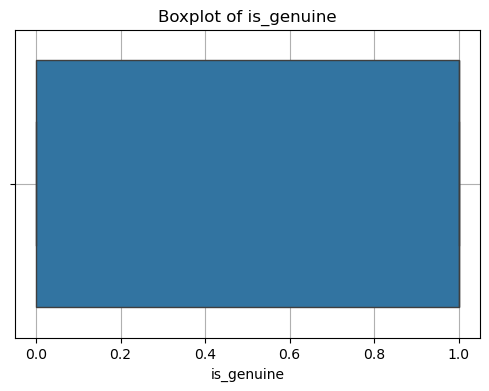

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['is_genuine'])
plt.title("Boxplot of is_genuine")
plt.grid(True)
plt.show()

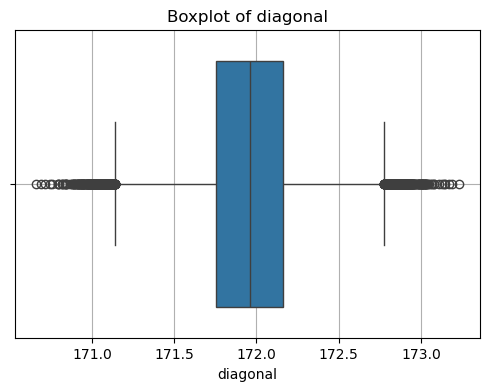

In [9]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['diagonal'])
plt.title("Boxplot of diagonal")
plt.grid(True)
plt.show()

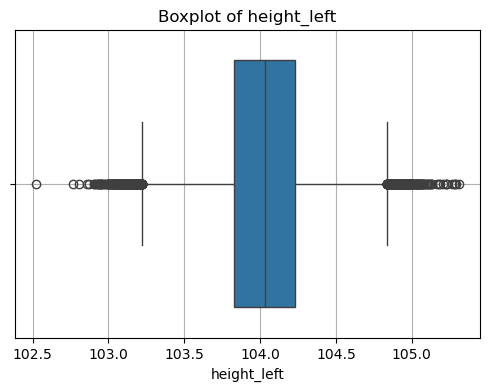

In [10]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['height_left'])
plt.title("Boxplot of height_left")
plt.grid(True)
plt.show()

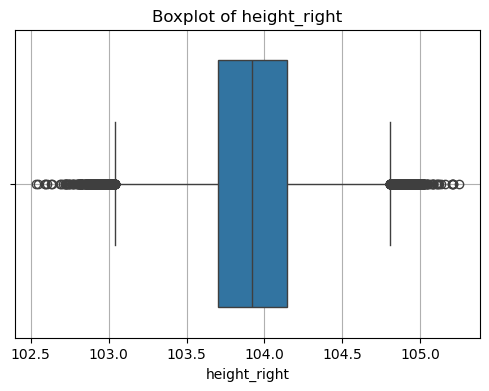

In [11]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['height_right'])
plt.title("Boxplot of height_right")
plt.grid(True)
plt.show()

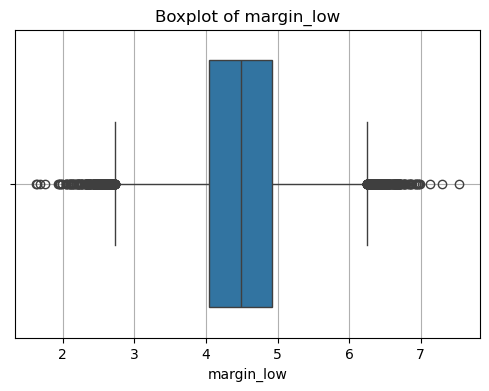

In [12]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['margin_low'])
plt.title("Boxplot of margin_low")
plt.grid(True)
plt.show()

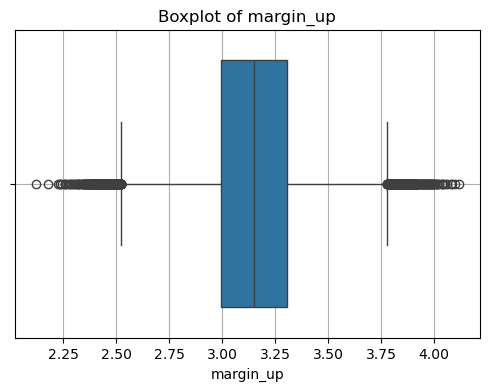

In [13]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['margin_up'])
plt.title("Boxplot of margin_up")
plt.grid(True)
plt.show()

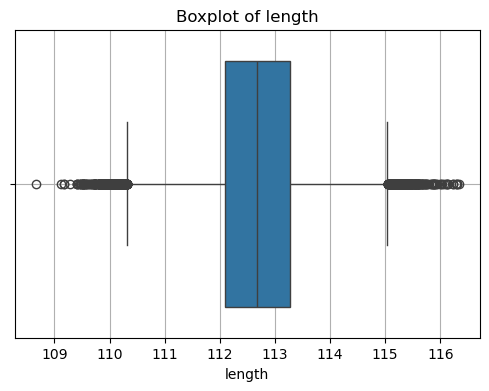

In [14]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['length'])
plt.title("Boxplot of length")
plt.grid(True)
plt.show()

C:\Users\adava\AppData\Local\Temp\ipykernel_2884\2565615934.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="is_genuine", data=df, palette=["blue", "red"])


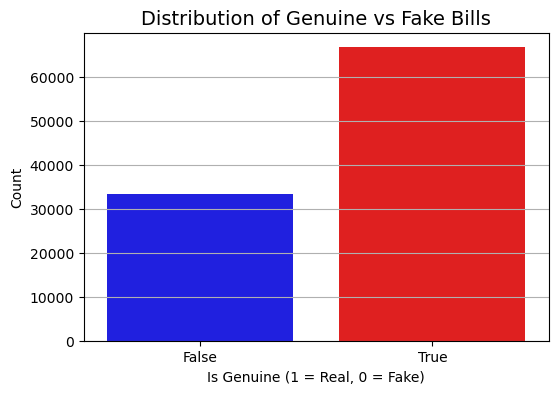

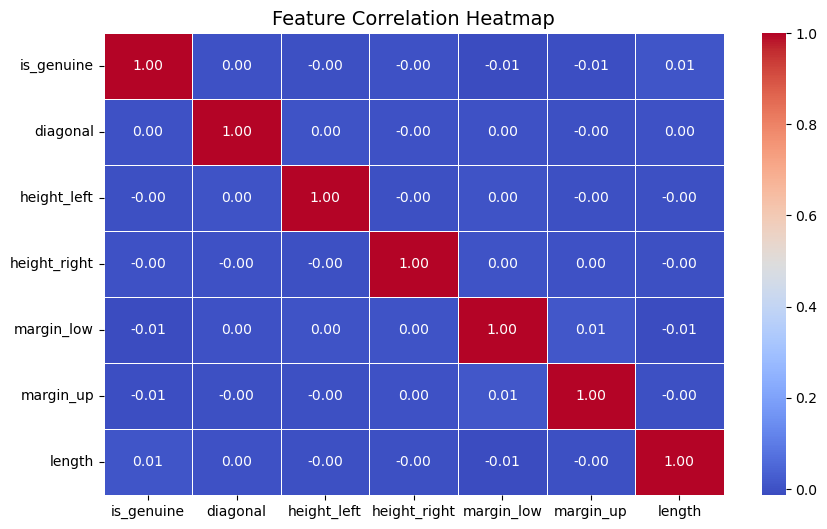

In [15]:

plt.figure(figsize=(6, 4))
sns.countplot(x="is_genuine", data=df, palette=["blue", "red"])
plt.title("Distribution of Genuine vs Fake Bills", fontsize=14)
plt.xlabel("Is Genuine (1 = Real, 0 = Fake)")
plt.ylabel("Count")
plt.grid(axis="y")
plt.show()

corr_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()


In [16]:
df.fillna(df.mean(), inplace=True)  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   is_genuine    100000 non-null  bool   
 1   diagonal      100000 non-null  float64
 2   height_left   100000 non-null  float64
 3   height_right  100000 non-null  float64
 4   margin_low    100000 non-null  float64
 5   margin_up     100000 non-null  float64
 6   length        100000 non-null  float64
dtypes: bool(1), float64(6)
memory usage: 4.7 MB


#### Observations
- There are 100000 rows and 7 columns
- there are no null values


In [18]:
duplicate_count = df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicate_count}")

Total Duplicate Rows: 0


#### Observations ####
- there are no duplicate rows


<Axes: xlabel='is_genuine', ylabel='count'>

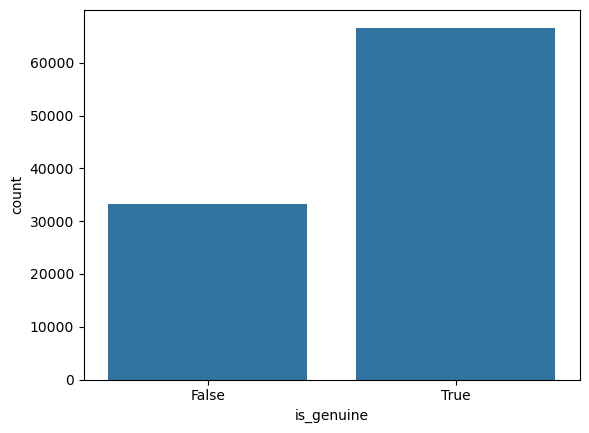

In [20]:
counts = df["is_genuine"].value_counts()
sns.barplot(data = counts)

In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[:, 0] = labelencoder.fit_transform(df.iloc[:,0])
df.head()

C:\Users\adava\AppData\Local\Temp\ipykernel_2884\3010013691.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 ... 1 1 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.iloc[:, 0] = labelencoder.fit_transform(df.iloc[:,0])


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   is_genuine    100000 non-null  int64  
 1   diagonal      100000 non-null  float64
 2   height_left   100000 non-null  float64
 3   height_right  100000 non-null  float64
 4   margin_low    100000 non-null  float64
 5   margin_up     100000 non-null  float64
 6   length        100000 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 5.3 MB


#### Observations ####
- now the datatype of the is_genuine is changed for boolean to int

In [24]:
df.head(3)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16


In [25]:
X = df.iloc[:,1:6]
Y = df['is_genuine']

In [26]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
99995    1
99996    0
99997    1
99998    1
99999    0
Name: is_genuine, Length: 100000, dtype: int64

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state = 1)
x_train


,diagonal,height_left,height_right,margin_low,margin_up
80630,172.303698,104.328148,104.317208,5.113640,2.734878
62017,171.903572,104.069075,104.008430,3.785530,2.811617
5005,171.944080,104.301862,103.973274,4.238733,3.330736
56849,171.887161,104.144046,103.786472,4.063242,3.034611
42434,171.676315,103.893759,103.590398,4.301860,3.148978
...,...,...,...,...,...
50057,171.622008,103.533080,103.609002,4.895290,3.516022
98047,171.743273,103.855096,103.959868,4.683703,3.030813
5192,171.978370,103.782669,104.116877,3.866491,3.178710
77708,171.842577,103.966267,104.043376,4.964237,3.508340


In [28]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth = None)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

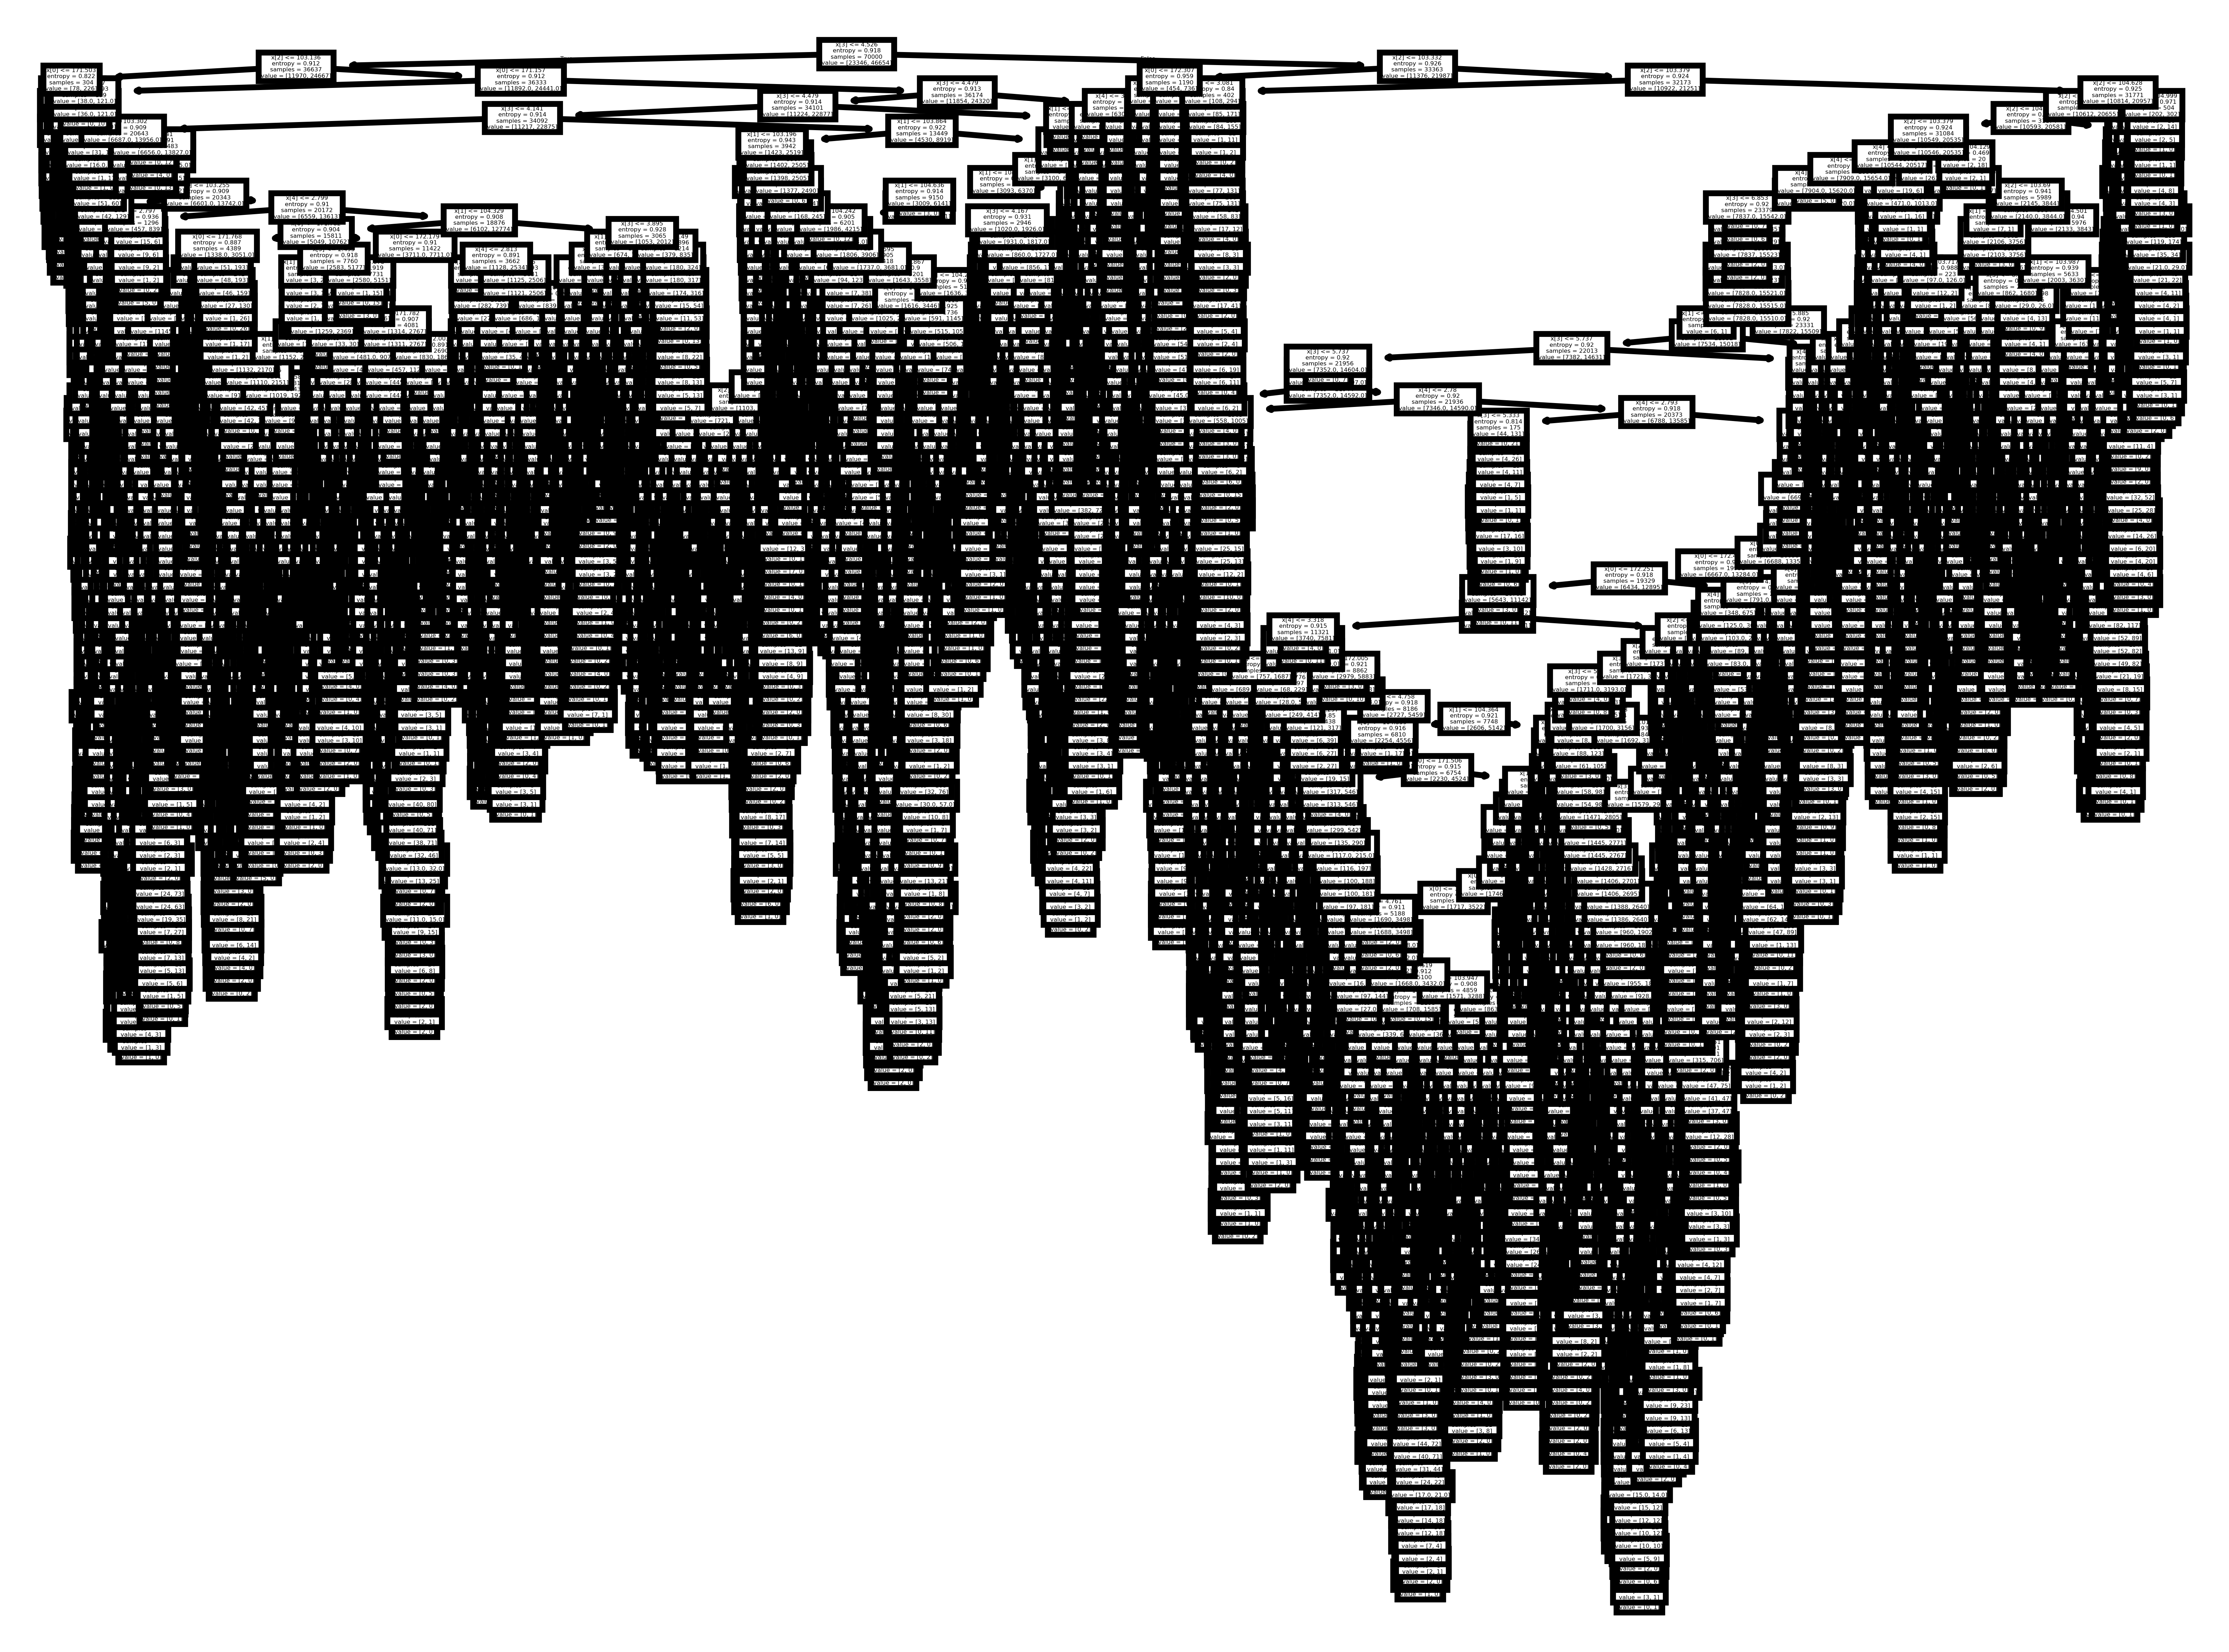

In [29]:
plt.figure(dpi=1200)
tree.plot_tree(model);
plt.show()

In [ ]:
fn=['diagonal','height_left','height_right','margin_low', 'margin_up', 'length']
cn=['True', 'False']
plt.figure(dpi=1200)
tree.plot_tree(model, feature_names=fn, class_names=cn, filled=True)
plt.show()

In [31]:
preds = model.predict(x_test)
preds

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [32]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.33      0.34      0.34      9995
           1       0.67      0.65      0.66     20005

    accuracy                           0.55     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.55      0.55      0.55     30000



In [33]:
pred_train = model.predict(x_train)
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23346
           1       1.00      1.00      1.00     46654

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000



In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = Fake_Bill.iloc[:, 1:]  
Y = Fake_Bill.iloc[:, 0]

kfold = StratifiedKFold(n_splits=10,random_state=2023,shuffle=True)

model = RandomForestClassifier(n_estimators=200,random_state = 20, max_depth=None)
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print(results.mean())


In [ ]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2, 3, 5, None],
    'min_samples_leaf': [5, 10, 20],
    'n_estimators': [50, 100, 200, 500],
    'max_features': ["sqrt", "log2", None],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=params,
    cv=kfold,
    n_jobs=-1,
    verbose=10,
    scoring="accuracy"
)

grid_search.fit(X, y)

print(grid_search.best_params_)
print(grid_search.best_score_)
